In [171]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row          10000 non-null  int64  
 1   Id           10000 non-null  int64  
 2   Surname      10000 non-null  object 
 3   Score        10000 non-null  int64  
 4   Nationality  10000 non-null  object 
 5   Gender       10000 non-null  object 
 6   Age          10000 non-null  int64  
 7   Tenure       10000 non-null  int64  
 8   Balance      10000 non-null  float64
 9   Products     10000 non-null  int64  
 10  Card         10000 non-null  int64  
 11  Active       10000 non-null  int64  
 12  Salary       10000 non-null  float64
 13  Exited       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe(include='int64')

,Row,Id,Score,Age,Tenure,Products,Card,Active,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,1.000000


In [9]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
data.isna().sum()

Row            0
Id             0
Surname        0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

In [11]:
data.head(2)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [12]:
data['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [15]:
for i in data.columns:
    print(data[i].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: Row, Length: 10000, dtype: int64
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: Id, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: Score, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Nationality, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int6

In [24]:
data.head(10)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [27]:
data.groupby(['Exited','Nationality','Gender']).agg({'Score':'mean','Salary':'mean','Balance':'mean','Products':'mean'})

Score         Salary        Balance  Products
Exited Nationality Gender                                                    
0      France      Female  650.536369   98526.820627   58424.310061  1.556913
                   Male    651.631294   99734.445789   61774.503758  1.529754
       Germany     Female  654.514094  103987.042242  118828.514362  1.538255
                   Male    652.278947  101181.577505  119896.529105  1.561053
       Spain       Female  653.494172   98900.649091   56594.820688  1.566434
                   Male    651.115257   98390.161260   61871.626285  1.529022
1      France      Female  643.897826  103626.025065   67755.162630  1.510870
                   Male    639.308571  103193.839686   75710.827800  1.431429
       Germany     Female  650.732143   99884.458728  119673.872321  1.466518
                   Male    643.964481   96591.601257  121202.242432  1.439891
       Spain       Female  645.363636  107544.095758   71997.673680  1.597403
                   Male    650.175824   98661.099011   73167.867802  1.406593

In [29]:
data[(data.Exited==0) & (data.Nationality=='Spain')]

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9967,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0


<AxesSubplot:xlabel='Salary', ylabel='Exited'>

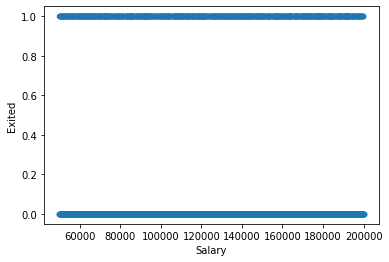

In [39]:
data[data['Salary'] > 50000].plot.scatter(x='Salary', y='Exited')


<AxesSubplot:>

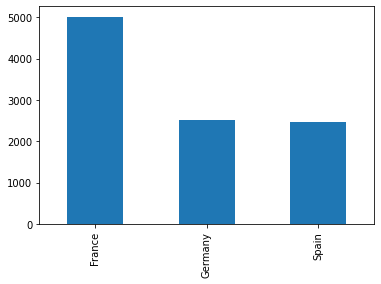

In [41]:
data['Nationality'].value_counts().plot.bar()

<AxesSubplot:>

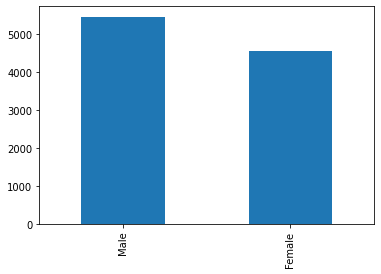

In [42]:
data['Gender'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

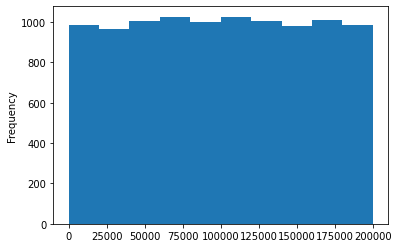

In [43]:
data['Salary'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

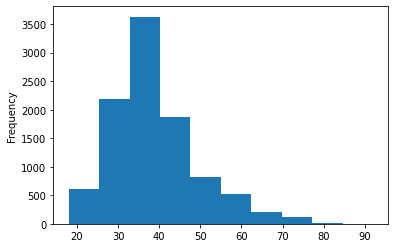

In [44]:
data['Age'].plot.hist()

In [45]:
data.columns

Index(['Row', 'Id', 'Surname', 'Score', 'Nationality', 'Gender', 'Age',
       'Tenure', 'Balance', 'Products', 'Card', 'Active', 'Salary', 'Exited'],
      dtype='object')

In [46]:
columns = ['Score','Age','Tenure','Balance','Salary']

Score
Age
Tenure
Balance
Salary


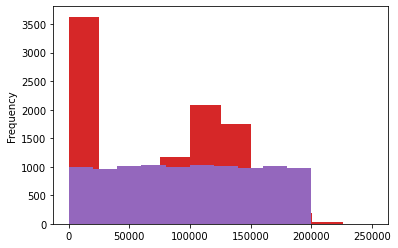

In [48]:
for i in columns:
    print(i)
    data[i].plot.hist()

array([[<AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

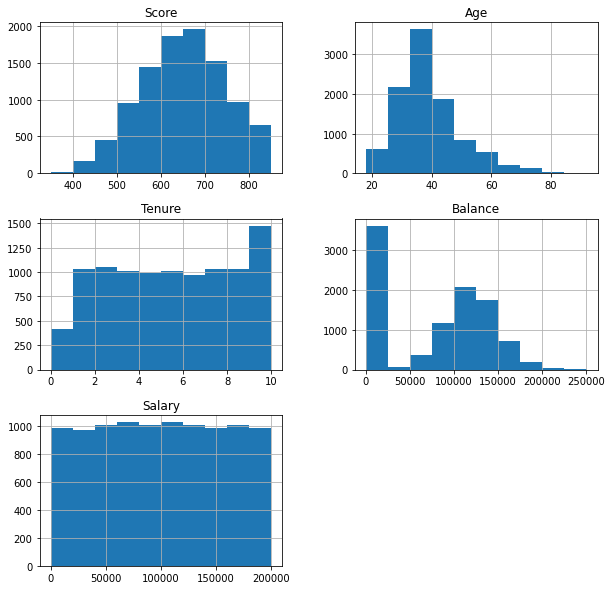

In [50]:
data[columns].hist(figsize=(10,10))

In [51]:
data.head(5)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
data = data.drop(['Row','Id','Surname'],axis=1)

In [54]:
data

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [125]:
le  = LabelEncoder()

In [140]:
x = data.drop(['Exited'],axis=1)

In [143]:
y = data['Exited']

In [144]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=43)

In [145]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 10)
(7000,)
(3000, 10)
(3000,)


In [146]:
data.iloc[:,-1]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [147]:
data.shape

(10000, 11)

In [148]:
data.iloc[:,-1]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [149]:
l1 = le.fit(X_train['Nationality'])

In [150]:
X_train['Nationality'] = l1.fit_transform(X_train['Nationality'])

In [151]:
X_test['Nationality'] = l1.fit_transform(X_test['Nationality'])

In [152]:
le_columns = ['Nationality','Gender']

In [180]:
def lecoder(lec):
    for i in lec:
        le = LabelEncoder()
        le.fit(X_train[i])
        X_train[i] = le.transform(X_train[i])
        X_test[i] = le.transform(X_test[i])
        
    

In [181]:
lecoder(le_columns)

In [182]:
X_train

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary
2724,453,1,0,38,8,120623.21,1,1,0,129697.99
5057,753,1,0,46,3,111512.75,3,1,0,159576.75
6027,850,1,1,44,3,140393.65,2,0,1,186285.52
6729,454,1,0,50,10,92895.56,1,1,0,154344.00
9132,635,0,0,33,5,0.00,2,1,0,122949.71
...,...,...,...,...,...,...,...,...,...,...
8499,498,1,1,35,2,121968.11,2,0,1,188343.05
2064,765,0,1,44,6,0.00,2,1,1,159899.97
7985,696,1,0,27,2,96129.32,2,1,1,5983.70
2303,714,2,1,45,0,124693.48,1,0,1,187194.15


In [183]:
X_test

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary
9415,768,1,0,43,2,129264.05,2,0,0,19150.14
6377,692,0,1,33,9,0.00,1,1,0,113505.93
8019,683,0,0,73,8,137732.23,2,1,1,133210.44
7754,563,2,0,42,6,99056.22,2,1,0,154347.95
4961,689,1,1,45,0,130170.82,2,1,0,150856.38
...,...,...,...,...,...,...,...,...,...,...
9363,634,2,1,35,3,0.00,2,1,1,19515.48
9448,583,1,1,35,8,149995.72,2,1,0,42143.55
9605,736,0,0,29,9,0.00,2,0,0,176152.70
9486,753,0,1,32,6,177729.13,1,1,1,161642.08


In [184]:
lr = LogisticRegression()

In [185]:
mode1 = lr.fit(X_train,y_train)

In [186]:
y_pred = mode1.predict(X_test)

In [187]:
import numpy as np

In [188]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [189]:
lr.score(X_test,y_test)

0.7923333333333333

In [190]:
accuracy_score(y_test,y_pred)

0.7923333333333333

In [191]:
data['Salary'].mean()

100090.239881

In [192]:
data['Salary'].std()

57510.49281769816

In [193]:
data.head(2)

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [194]:
num_cols = ['Score','Age','Tenure','Products','Card','Active','Salary']

In [195]:
X_train_scaled = X_train.copy()

In [196]:
X_test_scaled = X_test.copy()

In [204]:
for i in num_cols:
    sc = StandardScaler()
    sc.fit(X_train_scaled[[i]])
    X_train_scaled[i] = sc.transform(X_train_scaled[[i]])
    X_test_scaled[i] = sc.transform(X_test_scaled[[i]])

In [206]:
# for i in num_cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_scaled[[i]])
    
#     # transform the training data column
#     X_train_scaled[i] = scale.transform(X_train_scaled[[i]])
    
#     # transform the testing data column
#     X_test_scaled[i] = scale.transform(X_test_scaled[[i]])

()

In [208]:
mode12 = lr.fit(X_train_scaled,y_train)

In [209]:
y_sc_pred = mode12.predict(X_test_scaled)

In [210]:
mode12.score(X_test_scaled,y_test)

0.7963333333333333

In [212]:
mode1.score(X_train_scaled,y_train)

0.799

In [228]:
dict_mean_std = {}
for i in num_cols:
    dict_mean_std[i] = {'mean':X_train[i].mean(), 'std':X_train[i].std()}
    

In [229]:
dict_mean_std

{'Score': {'mean': 649.6677142857143, 'std': 96.88623376025014},
 'Age': {'mean': 39.063428571428574, 'std': 10.563328896515136},
 'Tenure': {'mean': 5.021, 'std': 2.8857838932225377},
 'Products': {'mean': 1.530857142857143, 'std': 0.5788745179657316},
 'Card': {'mean': 0.705, 'std': 0.456075339126421},
 'Active': {'mean': 0.5111428571428571, 'std': 0.4999115305561918},
 'Salary': {'mean': 99321.62164428571, 'std': 57523.93091882241}}

In [236]:
for i, k in dict_mean_std.items():
    print(k['mean'])

649.6677142857143
39.063428571428574
5.021
1.530857142857143
0.705
0.5111428571428571
99321.62164428571


In [237]:
da = pd.read_csv('/home/yanthura/Downloads/california_housing_test.csv')

In [238]:
da

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
